In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from copy import copy
params = {
   'axes.labelsize': 10,
   'font.size': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'axes.titlesize':10,
   'text.usetex': True,
   'font.family':'serif',
   'font.serif':'Computer Modern'
   }
matplotlib.rcParams.update(params)
matplotlib.rcParams["font.serif"] = "Computer Modern Roman"
matplotlib.rcParams["font.family"] = "Serif"
matplotlib.rcParams['text.latex.preamble'] = r'\renewcommand{\mathdefault}[1][]{}'

from matplotlib.markers import MarkerStyle
import matplotlib as mpl

In [2]:
import GWPhotonCounting
import jax.numpy as jnp


frequencies = jnp.sort(jnp.fft.fftfreq(2**13, d=1/1e4))
print(1/jnp.sqrt(frequencies[1] - frequencies[0]))
detector = GWPhotonCounting.detector.Detector(
    frequencies, '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_shot_psd_nosqz.csv', 
    '/home/ethan.payne/projects/GWPhotonCounting/examples/data/CE_classical_psd.csv', 
    gamma=100, random_seed=1632, N_frequency_spaces=10, N_time_spaces=10)

/home/ethan.payne/code_libraries/bilby/bilby/gw/detector/geometry.py:5: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import ROT_DAY, DAYJUL_SI
/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.9050966799187808
N_total_filters for Nyquist: 200
N_total_filters from user: 200


In [15]:
# import h5py

# data_CE1 = h5py.File('data/traces_CE2silica.h5', 'r')
# freqs = data_CE1['freq'][()]
# shot_psd_nosqz = data_CE1['nosqz'][()]
# shot_psd_sqz = data_CE1['sqz'][()]

# classical_quanta = data_CE1['classical'][()]/(2*shot_psd_nosqz)



# import numpy as np

# np.savetxt('data/CE_shot_psd_nosqz.csv', np.array([freqs, shot_psd_nosqz]).T)
# np.savetxt('data/CE_shot_psd_sqz.csv', np.array([freqs, shot_psd_sqz]).T)
# np.savetxt('data/CE_classical_psd.csv', np.array([freqs, data_CE1['classical'][()]]).T)
# np.savetxt('data/CE_total_psd_sqz.csv', np.array([freqs, shot_psd_sqz+data_CE1['classical'][()]]).T)


# data_CE1.close()

In [16]:
# import h5py

# data_CE1 = h5py.File('data/traces_CE2silicon.h5', 'r')
# freqs = data_CE1['freq'][()]
# shot_psd_nosqz = data_CE1['nosqz'][()]
# shot_psd_sqz = data_CE1['sqz'][()]

# classical_quanta = data_CE1['classical'][()]/(2*shot_psd_nosqz)



# import numpy as np

# np.savetxt('data/CE2silicon_shot_psd.csv', np.array([freqs, shot_psd_nosqz]).T)
# np.savetxt('data/CE2silicon_classical_quanta.csv', np.array([freqs, classical_quanta]).T)
# np.savetxt('data/CE2silicon_sqz_total_psd.csv', np.array([freqs, shot_psd_sqz+data_CE1['classical'][()]]).T)


# data_CE1.close()

In [17]:
LorentzianModel = GWPhotonCounting.signal.PostMergerLorentzian()
KNNModel = GWPhotonCounting.signal.PostMergerKNN(knn_file_path='/home/ethan.payne/code_libraries/apr4_knn_gw_model_2024/KNN_Models/APR4-knn_model-N100')

/home/ethan.payne/.conda/envs/ve310/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [18]:


mtot = 2.4
phi0 = 0
z = 0.05
ra = jnp.pi/4
dec = jnp.pi/4
iota=jnp.pi/4
psi = 0

# mtots, z, phi, psi, ra, dec, iota, f0_fit, gamma_fit, A_fit, phase_fit, snr, snr_sqz = [
#         2.61818695e+00, 2.08329854e+00, 5.35330329e+00, 2.29492744e+00,
#        3.98733925e+00, 6.17580362e-01, 2.42270780e+00, 1.10137455e+03,
#        1.59427071e+01, 1.40546151e-24, 2.10024603e+00, 1.32405809e-03,
#        3.13480987e-03]

PM_strain = KNNModel.generate_strain(detector, frequencies, mtot, phi0, z, ra, dec, iota, psi)

#PM_strain = LorentzianModel.generate_strain(detector, frequencies, f0_fit, gamma_fit, A_fit, phase_fit, 0)[0]


In [19]:
frequencies[jnp.argmax(jnp.abs(PM_strain))] 

Array(3002.9296875, dtype=float64)

In [20]:
expected_signal_photon_count = detector.calculate_signal_photon_expectation(PM_strain, frequencies)

In [21]:
print('Optimal SNR', detector.calculate_optimal_snr(PM_strain, frequencies, fmin=1.5e3))
print('Expected photon count from SNR', detector.calculate_optimal_snr(PM_strain, frequencies, fmin=1.5e3)**2/2)
print('Expected photon count from filters', jnp.sum(expected_signal_photon_count))

Optimal SNR 1.0976272515356136
Expected photon count from SNR 0.6023927916568126
Expected photon count from filters 0.1937745582415522


In [22]:
print(jnp.max(expected_signal_photon_count))

0.03748923653412383


In [31]:
jnp.sum(expected_signal_photon_count)/jnp.sum(detector.noise_photon_expectation)

Array(1.76858039, dtype=float64)

/local/ethan.payne/ipykernel_3626854/1398805523.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


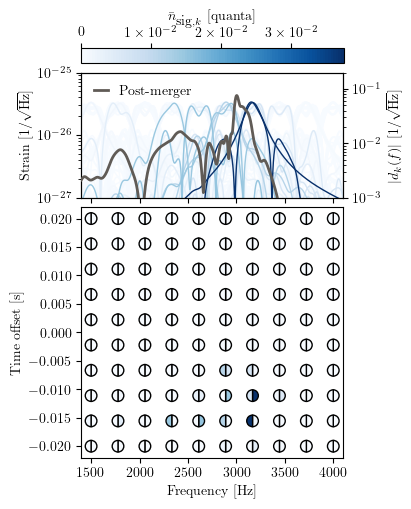

In [12]:
# Make plot for the n_exp_photons 

#fig = GWPhotonCounting.plotting.generate_count_plot((expected_signal_photon_count), detector)

fig = GWPhotonCounting.plotting.generate_count_plot_with_strain(expected_signal_photon_count, detector, frequencies, PM_strain)
#fig = GWPhotonCounting.plotting.generate_count_plot((detector.noise_photon_expectation)*1e3, detector)
fig.tight_layout()

axs = fig.get_axes()


fig.savefig('photon_counting_switchboard.pdf', bbox_inches='tight')

Array(188, dtype=int64)

In [11]:
poisson_likelihood = GWPhotonCounting.distributions.PoissonPhotonLikelihood()

noise_likelihood = GWPhotonCounting.distributions.PhaseQuadraturePhotonLikelihood()

mixture_likelihood = GWPhotonCounting.distributions.MixturePhotonLikelihood(poisson_likelihood, noise_likelihood)

gaussian_likelihood = GWPhotonCounting.distributions.GaussianStrainLikelihood()


In [12]:
observed_photons, observed_signal_photons, observed_noise_photons = \
    mixture_likelihood.generate_realization(
        expected_signal_photon_count, detector.noise_photon_expectation)

# Simulating a photon count
observed_signal_photons = jnp.zeros(len(observed_photons))
observed_signal_photons = observed_photons.at[jnp.argmax(expected_signal_photon_count)].set(1)
observed_noise_photons = jnp.zeros(len(observed_photons))#observed_photons.at[jnp.argmax(detector.noise_photon_expectation)].set(1)
observed_photons = observed_signal_photons + observed_noise_photons

print('Observed photons count: ', jnp.sum(observed_photons))
print(f'Observed signal (noise) photons: {jnp.sum(observed_signal_photons)} ({jnp.sum(observed_noise_photons)})')
print('Expected photon count where observed photons are: ', expected_signal_photon_count[observed_photons > 0])


Observed photons count:  1.0
Observed signal (noise) photons: 1.0 (0.0)
Expected photon count where observed photons are:  [0.04282411]


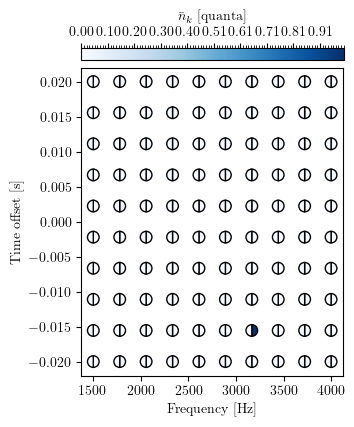

In [13]:
fig = GWPhotonCounting.plotting.generate_count_plot(observed_photons, detector)

In [14]:
fit_lorentzian_n = GWPhotonCounting.inference.PhotonCountingInference(detector, frequencies, mixture_likelihood).run(
    observed_photons,
    num_warmup=100,
    num_samples=500,
    num_chains=2, time_reconstruction=False, f0min=1500)

fit_lorentzian_n_0d01 = GWPhotonCounting.inference.PhotonCountingInference(detector, frequencies, mixture_likelihood).run(
    observed_photons,
    num_warmup=100,
    num_samples=500,
    num_chains=2, time_reconstruction=False, f0min=1500, noise_scale=0.01)

# fit_lorentzian_n = GWPhotonCounting.inference.PhotonCountingInference(detector, frequencies, poisson_likelihood, include_background=False).run(
#     observed_photons,
#     num_warmup=200,
#     num_samples=1000,
#     num_chains=1)

/home/ethan.payne/projects/GWPhotonCounting/src/GWPhotonCounting/inference.py:97: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(kernel, num_warmup=num_warmup, num_samples=num_samples, num_chains=num_chains)
sample: 100%|██████████| 600/600 [04:32<00:00,  2.20it/s, 7 steps of size 1.79e-01. acc. prob=0.98]  


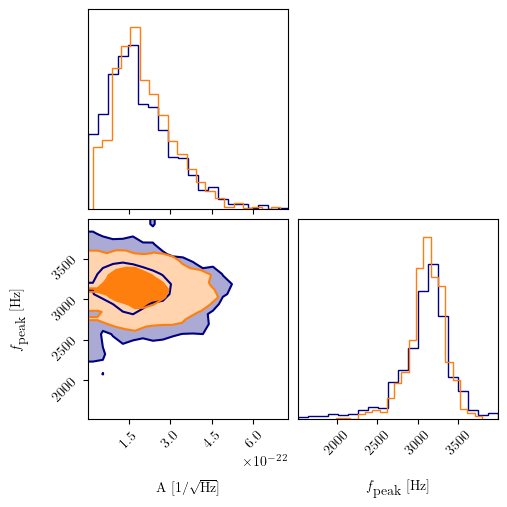

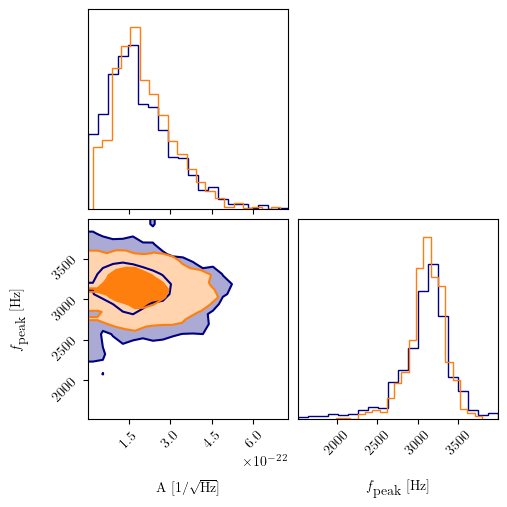

In [15]:
from corner import corner

fig = corner(fit_lorentzian_n.posterior, plot_datapoints=False, fill_contours=True, plot_density=False, color='navy', levels=[0.5,0.9], smooth=0.7, 
      var_names=['A', 'f0'], labels=[r'A [1/$\sqrt{\textrm{Hz}}$]', r'$f_\textrm{peak}$ [Hz]'], hist_kwargs={'density':True})

corner(fit_lorentzian_n_0d01.posterior, plot_datapoints=False, fill_contours=True, plot_density=False, color='C1', levels=[0.5,0.9], smooth=0.7, 
      var_names=['A', 'f0'], labels=[r'A [1/$\sqrt{\textrm{Hz}}$]', r'$f_\textrm{peak}$ [Hz]'], hist_kwargs={'density':True}, fig=fig)

In [16]:
observed_strain = PM_strain + gaussian_likelihood.generate_realization(detector_squeeze.total_psd, frequencies)

fit_lorentzian_strain = GWPhotonCounting.inference.StrainInference(detector_squeeze, frequencies, gaussian_likelihood).run(
    observed_strain,
    num_warmup=1000,
    num_samples=1000,
    num_chains=2, time_reconstruction=False, f0min=1.5e3)

NameError: name 'detector_squeeze' is not defined

2.1131512029732466e-23


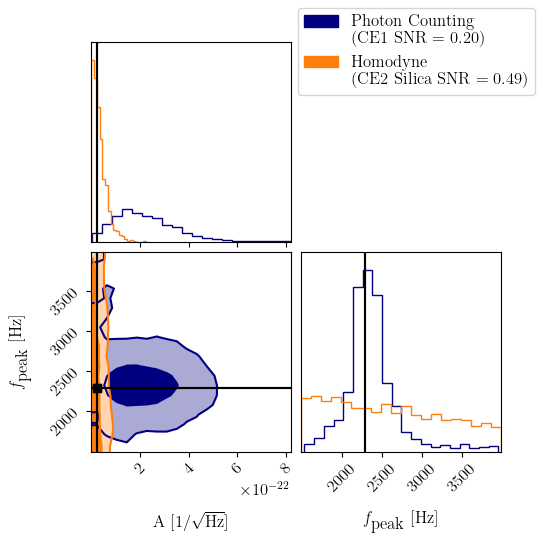

In [ ]:
from corner import corner

fpeak = jnp.abs(frequencies[jnp.argmax(jnp.abs(PM_strain))])

print(A)



fig = corner(fit_lorentzian_n.posterior, plot_datapoints=False, fill_contours=True, plot_density=False, color='navy', levels=[0.5,0.9], smooth=0.7, 
      var_names=['A', 'f0'], labels=[r'A [1/$\sqrt{\textrm{Hz}}$]', r'$f_\textrm{peak}$ [Hz]'], hist_kwargs={'density':True}, truths=[A, fpeak], truth_color='k')

corner(fit_lorentzian_strain.posterior, plot_datapoints=False, fill_contours=True, plot_density=False, color='C1', levels=[0.5,0.9], smooth=0.7, 
      var_names=['A', 'f0'], labels=[r'A [1/$\sqrt{\textrm{Hz}}$]', r'$f_\textrm{peak}$ [Hz]'], hist_kwargs={'density':True}, truths=[A, fpeak], truth_color='k', fig=fig)

legend_labels = [Patch(color='navy', label=r'\noindent Photon Counting \\ (CE1 SNR $ =0.20$)'), Patch(color='C1', label=r'\noindent Homodyne \\ (CE2 Silica SNR $ = 0.49$)')]
fig.legend(handles=legend_labels, loc='upper right', fontsize=12)

fig.savefig('corner_plot.png', dpi=300, bbox_inches='tight')

In [ ]:
from tqdm import tqdm 

lorentzian_fit_strain_array = []
homodyne_lorentzian_fit_strain_array = []

for i in tqdm(range(2000)):
    lorentzian_fit_strain_i = LorentzianModel.generate_strain(
        detector, frequencies, 
        fit_lorentzian_n.posterior.f0.values.flatten()[i], fit_lorentzian_n.posterior.gamma.values.flatten()[i], 
        fit_lorentzian_n.posterior.A.values.flatten()[i], 0, 
        fit_lorentzian_n.posterior.phase.values.flatten()[i])[0,]
    
    homodyne_lorentzian_fit_strain_i = LorentzianModel.generate_strain(
        detector, frequencies, 
        fit_lorentzian_strain.posterior.f0.values.flatten()[i], fit_lorentzian_strain.posterior.gamma.values.flatten()[i], 
        fit_lorentzian_strain.posterior.A.values.flatten()[i], 0, 
        fit_lorentzian_strain.posterior.phase.values.flatten()[i])[0,]
    
    lorentzian_fit_strain_array.append(jnp.abs(lorentzian_fit_strain_i))
    homodyne_lorentzian_fit_strain_array.append(jnp.abs(homodyne_lorentzian_fit_strain_i))

lorentzian_fit_strain_array = jnp.array(lorentzian_fit_strain_array)
homodyne_lorentzian_fit_strain_array = jnp.array(homodyne_lorentzian_fit_strain_array)

100%|██████████| 2000/2000 [00:04<00:00, 468.81it/s]


/local/ethan.payne/ipykernel_3850162/526672060.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


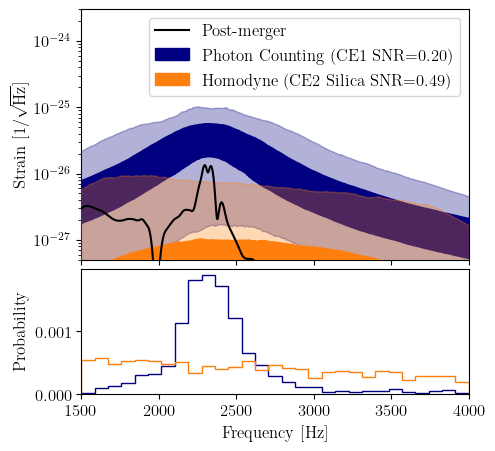

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(5,5), sharex=True, gridspec_kw={'height_ratios': [2, 1], 'hspace':0.05})

ax[0].plot(frequencies, jnp.abs(PM_strain), label='Post-merger', color='k',zorder=100)

# ax[0].plot(frequencies, lorentzian_fit_strain_array[:100].T, label='Photon Counting', color='navy', alpha=0.1)
# ax[0].plot(frequencies, homodyne_lorentzian_fit_strain_array[:100].T, label='Homodyne', color='C1', alpha=0.1)
#ax[0].plot(frequencies, jnp.median(lorentzian_fit_strain_array, axis=0), label='Photon Counting', color='navy')
ax[0].fill_between(frequencies, jnp.percentile(lorentzian_fit_strain_array, 25, axis=0), jnp.percentile(lorentzian_fit_strain_array, 75, axis=0), color='navy', alpha=1,zorder=90,label='Photon Counting (CE1 SNR=0.20)')
ax[0].fill_between(frequencies, jnp.percentile(lorentzian_fit_strain_array, 5, axis=0), jnp.percentile(lorentzian_fit_strain_array, 95, axis=0), color='navy', alpha=0.3,zorder=80)
ax[0].fill_between(frequencies, jnp.zeros(len(frequencies)), jnp.percentile(homodyne_lorentzian_fit_strain_array, 50, axis=0), color='C1', alpha=1,zorder=92,label='Homodyne (CE2 Silica SNR=0.49)')
ax[0].fill_between(frequencies, jnp.zeros(len(frequencies)), jnp.percentile(homodyne_lorentzian_fit_strain_array, 90, axis=0), color='C1', alpha=0.3,zorder=91)

ax[0].set_xlim(1.5e3, 4e3)
ax[0].set_ylim(5e-28,3e-24)

ax[0].legend(loc='upper right')

ax[0].set_yscale('log')

ax[1].hist(fit_lorentzian_n.posterior.f0.values.flatten(), bins=jnp.linspace(1.5e3,4e3,30), histtype='step', color='navy', density=True)
ax[1].hist(fit_lorentzian_strain.posterior.f0.values.flatten(), bins=jnp.linspace(1.5e3,4e3,30), histtype='step', color='C1', density=True)

ax[0].set_ylabel('Strain [$1/\sqrt{\mathrm{Hz}}$]')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Probability')

fig.tight_layout()
fig.savefig('strain_comparison.png', dpi=300, bbox_inches='tight')

In [ ]:
GWPhotonCounting.inference.save_analyses('example', fit_strain=fit_lorentzian_strain, outdir='results/',
               snr=float(detector.calculate_optimal_snr(PM_strain, frequencies)), 
               snr_squeeze=float(detector_squeeze.calculate_optimal_snr(PM_strain, frequencies)))

NameError: name 'GWPhotonCounting' is not defined

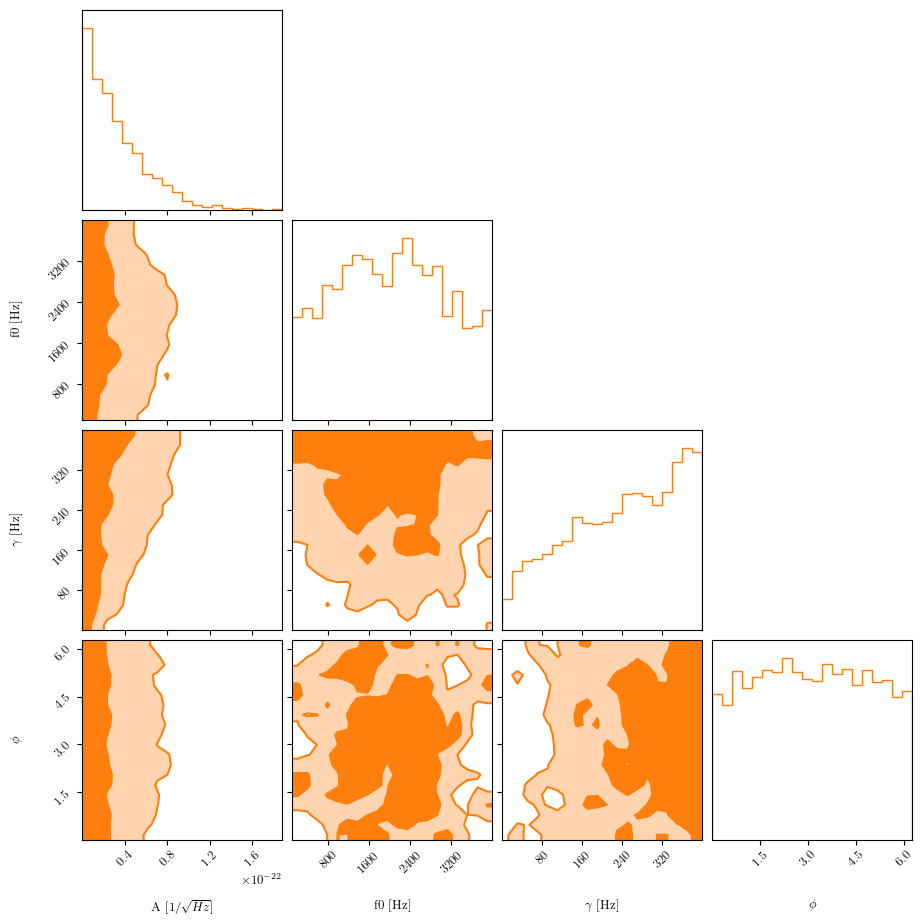

In [ ]:
from corner import corner 
import matplotlib.pyplot as plt

corner(fit_lorentzian_strain.posterior, plot_datapoints=False, fill_contours=True, plot_density=False, color='C1', levels=[0.5,0.9], smooth=0.7, 
      var_names=['A', 'f0', 'gamma', 'phase'], labels=[r'A [1/$\sqrt{Hz}$]', 'f0 [Hz]', r'$\gamma$ [Hz]', r'$\phi$'], 
      hist_kwargs={'density':True}, truths=[None, None, None, None], truth_color='k')

plt.show()

In [3]:
fmin = 100; fmax = 4000

mask1 = (frequencies >= fmin) & (frequencies <= fmax)
mask2 = (frequencies <= -fmin) & (frequencies >= -fmax)
mask = mask1 | mask2

In [8]:
frequencies[1] - frequencies[0]

Array(1.22070312, dtype=float64)